implementing VGG

# VGG16 Architecture

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION<br>VGG16 is object detection and classification algorithm which is able to classify 1000 images of 1000 different categories with 92.7% accuracy. It is one of the popular algorithms for image classification and is easy to use with transfer learning.<br>16 in VGG16 refers to 16 layers that have weights.<br> In VGG16 there are thirteen convolutional layers, five Max Pooling layers, and three Dense layers which sum up to 21 layers but it has only sixteen weight layers i.e., learnable parameters layer.VGG16 takes input tensor size as 224, 244 with 3 RGB channel<br>change the image input tensor to 224, which the VGG16 model uses.<br>The objective of ImageDataGenerator is to import data with labels easily into the model.  ImageDataGenerator will automatically label all the data inside the folder. In this way, data is easily ready to be passed to the neural network. most useful thing about this class is that it doesn’t affect the data stored on the disk. This class alters the data on the go while passing it to the model

Most unique thing about VGG16 is that instead of having a large number of hyper-parameters they focused on having convolution layers of 3x3 filter with stride 1 and always used the same padding and maxpool layer of 2x2 filter of stride 2

In [ ]:
def vgg_block(inputs, num_filters,num_conv ): # n_layers =num_conv
    for _ in range(num_conv):
        inputs = layers.Conv2D(num_filters, kernel_size=(3,3), padding='same', activation='relu')(inputs)
    return layers.MaxPooling2D(pool_size=(2,2))(inputs)

![image](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*6VP81rFoLWp10FcG)

![image](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*0M8CobXpNwFDCmOQ)

In [ ]:
def build_vgg(input_shape=(224,224,3), num_classes=1000):
    inputs = layers.Input(shape=input_shape)

    x =vgg_block(inputs, num_filters=64, num_conv=2)
    x =vgg_block(x, num_filters=128, num_conv=2)
    x =vgg_block(x, num_filters=256, num_conv=3)
    x =vgg_block(x, num_filters=512, num_conv=3)
    feature_extractor = vgg_block(x, num_filters=512, num_conv=3)

    x = layers.Flatten()(feature_extractor)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dense(4096, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

    # we can add another return here which , models.Model(inputs=inputs,outputs=feature_extractor)

In [ ]:
vgg_model = build_vgg()

In [ ]:
vgg_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

It is very slow to train .<br>
The size of VGG-16 trained imageNet weights is 528 MB. So, it takes quite a lot of disk space and bandwidth that makes it inefficient.

Using the wget Command: You can use wget to download the dataset directly from a URL.<br>  Here’s an example using the Oxford Pets Dataset:

Link: Oxford Pets Dataset
Description: A dataset of 37 different breeds of dogs and cats. It is commonly used for image classification tasks and is suitable for fine-tuning deep learning models like ResNet.
Task: Multi-class classification (37 classes).

In [1]:
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz


--2025-01-09 17:08:39--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2025-01-09 17:08:40--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  25.1MB/s    in 32s     

2025-01-09 17:09:13 (23.6 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]



Extract the Files: After downloading, extract the dataset to access the images and labels.

In [2]:
!tar -xvf images.tar.gz

Streaming output truncated to the last 5000 lines.
images/american_bulldog_194.jpg
images/Birman_175.jpg
images/american_bulldog_178.jpg
images/staffordshire_bull_terrier_93.jpg
images/Egyptian_Mau_58.jpg
images/havanese_44.jpg
images/english_cocker_spaniel_97.jpg
images/Ragdoll_111.jpg
images/american_pit_bull_terrier_159.jpg
images/english_setter_134.jpg
images/english_setter_87.jpg
images/wheaten_terrier_198.jpg
images/pug_180.jpg
images/boxer_172.jpg
images/Sphynx_197.jpg
images/german_shorthaired_2.jpg
images/British_Shorthair_9.jpg
images/pug_89.jpg
images/japanese_chin_39.jpg
images/Ragdoll_20.jpg
images/american_bulldog_111.jpg
images/yorkshire_terrier_112.jpg
images/Persian_88.jpg
images/pug_9.jpg
images/Birman_40.jpg
images/British_Shorthair_272.jpg
images/havanese_7.jpg
images/pomeranian_154.jpg
images/beagle_49.jpg
images/British_Shorthair_94.jpg
images/Persian_90.jpg
images/staffordshire_bull_terrier_30.jpg
images/samoyed_113.jpg
images/english_cocker_spaniel_46.jpg
images

In [3]:
!ls


drive  images  images.tar.gz  sample_data


In [4]:
import os

# Define the directory
image_dir = '/content/images'

# List all files in the directory
files = os.listdir(image_dir)

# Use a set to store unique breed names
unique_breeds = set()

# Iterate over all the files
for file in files:
    # Remove the file extension (e.g., .jpg)
    base_name = file.split('.')[0]

    # Split by underscore and take the part before the number (the breed name)
    breed_name = '_'.join(base_name.split('_')[:-1])  # Everything except the last part (the number)

    # Add the breed name to the set (duplicates will be automatically removed)
    unique_breeds.add(breed_name)

# Get the number of unique breeds
num_unique_breeds = len(unique_breeds)

# Print the number of unique breeds
print(f'Number of unique breeds: {num_unique_breeds}')

# Optionally print the unique breed names
for breed in unique_breeds:
    print(breed)


Number of unique breeds: 37
shiba_inu
Egyptian_Mau
pomeranian
Persian
British_Shorthair
beagle
german_shorthaired
saint_bernard
Bengal
chihuahua
Maine_Coon
newfoundland
great_pyrenees
pug
Birman
Siamese
Ragdoll
keeshond
yorkshire_terrier
wheaten_terrier
japanese_chin
boxer
leonberger
scottish_terrier
american_bulldog
Sphynx
samoyed
Bombay
english_setter
staffordshire_bull_terrier
Russian_Blue
basset_hound
Abyssinian
english_cocker_spaniel
miniature_pinscher
american_pit_bull_terrier
havanese


In [5]:
list(unique_breeds)

['shiba_inu',
 'Egyptian_Mau',
 'pomeranian',
 'Persian',
 'British_Shorthair',
 'beagle',
 'german_shorthaired',
 'saint_bernard',
 'Bengal',
 'chihuahua',
 'Maine_Coon',
 'newfoundland',
 'great_pyrenees',
 'pug',
 'Birman',
 'Siamese',
 'Ragdoll',
 'keeshond',
 'yorkshire_terrier',
 'wheaten_terrier',
 'japanese_chin',
 'boxer',
 'leonberger',
 'scottish_terrier',
 'american_bulldog',
 'Sphynx',
 'samoyed',
 'Bombay',
 'english_setter',
 'staffordshire_bull_terrier',
 'Russian_Blue',
 'basset_hound',
 'Abyssinian',
 'english_cocker_spaniel',
 'miniature_pinscher',
 'american_pit_bull_terrier',
 'havanese']

 all the images are placed directly in /content/images without any subdirectories for each class.

To resolve this, you'll need to organize the images into subdirectories where each subdirectory corresponds to a different class

used the below code to create subdirectories

In [6]:
import os
import shutil

image_dir = '/content/images'

class_names = list(unique_breeds)

# Create directories for each class
for class_name in class_names:
    class_dir = os.path.join(image_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)

# Iterate through the images in the image directory
for image in os.listdir(image_dir):
    if image.endswith(('.jpg', '.jpeg', '.png')):  # Ensure you're only working with image files
        for class_name in class_names:
            # If the image filename starts with the class name (case-sensitive)
            if image.startswith(class_name):
                # Move the image to the respective class folder
                shutil.move(os.path.join(image_dir, image), os.path.join(image_dir, class_name, image))
                break  # Exit the loop once the image is moved to avoid unnecessary checks


In [17]:
len(os.listdir('/content/images'))

38

In [18]:
os.listdir('/content/images')

['saint_bernard',
 'pomeranian',
 'Siamese',
 'Sphynx',
 'wheaten_terrier',
 'Russian_Blue',
 'shiba_inu',
 'english_cocker_spaniel',
 'newfoundland',
 'american_pit_bull_terrier',
 'Maine_Coon',
 'British_Shorthair',
 'samoyed',
 'beagle',
 'american_bulldog',
 'havanese',
 'chihuahua',
 'Bombay',
 'german_shorthaired',
 'Persian',
 'Abyssinian',
 'Birman',
 'leonberger',
 'Egyptian_Mau',
 'Ragdoll',
 'pug',
 '.ipynb_checkpoints',
 'staffordshire_bull_terrier',
 'japanese_chin',
 'miniature_pinscher',
 'boxer',
 'yorkshire_terrier',
 'great_pyrenees',
 'scottish_terrier',
 'keeshond',
 'basset_hound',
 'english_setter',
 'Bengal']

In [19]:
!rm -rf /content/images/.ipynb_checkpoints

In [21]:
len(os.listdir('/content/images'))

37

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
model =Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(37, activation='softmax'))

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
data_directory = '/content/images'

In [ ]:
train_dataset = ImageDataGenerator(preprocessing_function=preprocess_input,
                            validation_split = 0.2   )

val_dataset = ImageDataGenerator(preprocess_input, validation_split=0.2 )

In [ ]:
train_generator = train_dataset.flow_from_directory(data_directory, target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode ='categorical',
                                                    subset='training')

val_generator = val_dataset.flow_from_directory(data_directory, target_size=(224,224),
                                                batch_size=32, class_mode='categorical',
                                                subset='validation')

Found 5913 images belonging to 37 classes.
Found 1477 images belonging to 37 classes.


In [ ]:
# Check the number of images in the dataset
print(f"Training dataset size : {train_generator.samples}")
print(f"validation dataset size : {val_generator.samples}")

Training dataset size : 5913
validation dataset size : 1477


In [ ]:
#Fit the ImageDataGenerator on the training data
#train_dataset.fit(train_generator)  # Fit on the data to calculate statistics


In [ ]:
model.fit(train_generator, validation_data=val_generator, epochs=3)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.3688 - loss: 4.3962 

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


185/185 ━━━━━━━━━━━━━━━━━━━━ 4824s 26s/step - accuracy: 0.3696 - loss: 4.3848 - val_accuracy: 0.4353 - val_loss: 2.0678
Epoch 2/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 4686s 25s/step - accuracy: 0.7397 - loss: 0.8443 - val_accuracy: 0.4719 - val_loss: 2.0891
Epoch 3/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 4687s 25s/step - accuracy: 0.8075 - loss: 0.6030 - val_accuracy: 0.5085 - val_loss: 1.9237


In [ ]:
import numpy as np
predicted_class_indices = np.argmax(model.predict(val_generator), axis=1)
true_labels = val_generator.classes

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 952s 20s/step


In [ ]:
(true_labels == predicted_class_indices).sum()

38

In [ ]:
import pandas as pd
pd.DataFrame({'true_labels' :true_labels, 'predicted_labels': predicted_class_indices}).sample(20)

,true_labels,predicted_labels
614,15,3
686,17,13
1234,30,18
1242,31,20
999,24,6
1138,28,16
911,22,8
927,23,5
431,10,7
156,3,13


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img ='/content/images/Egyptian_Mau/Egyptian_Mau_150.jpg'
img =image.load_img(img,target_size=(224,224))
x = image.img_to_array(img)
x = preprocess_input(x)
x =np.expand_dims(x,axis=0)
np.argmax(model.predict(x), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


array([5])

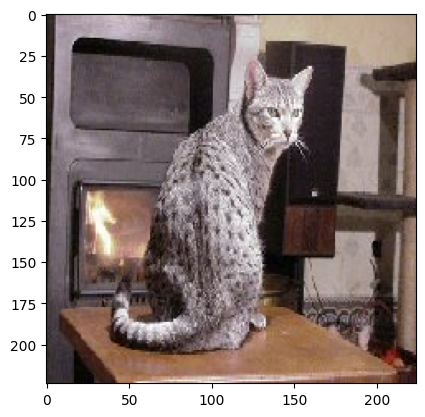

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img);

# Xception

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [8]:
img_size= (299) # Xception model input size (299x299)
num_classes =37 # 37 classes of pets

In [9]:
base_model = Xception(weights='imagenet',include_top=False, input_shape= (img_size, img_size, 3))


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
base_model.output_shape

(None, 10, 10, 2048)

In [11]:
base_model.trainable = False # Freeze the layers of the pre-trained model

In [12]:
# Define the model architecture using Sequential API
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())  # Flatten the output of the convolutional layers

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

### Unfreezing the Last Few Layers for Fine-Tuning:
unfreeze the last few layers of the base model to allow them to be fine-tuned.<br>
The layers closer to the output (top) of the model typically capture higher-level features, so unfreezing the last few allows you to fine-tune those features while keeping the lower-level features frozen.

In [13]:
# Unfreeze the last few layers of the Xception base model
for layer in base_model.layers[-10:]:
  layer.trainable =True

Learning Rate: When fine-tuning, it’s crucial to use a smaller learning rate. This is because the weights are already close to an optimal solution (thanks to pre-training on ImageNet), and we want to make small adjustments.

Fine-tuning is usually done for a smaller number of epochs because you're only fine-tuning the higher layers of the model.


In [14]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e5),
               loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 10, 10, 2048)        │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 37)                  │           9,509 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,395,533 (81.62 MB)

 Trainable params: 6,030,373 (23.00 MB)

 Non-trainable params: 15,365,160 (58.61 MB)

In [16]:
# Prepare data generators for training and validation
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                            validation_split = 0.2 )
val_datagen = ImageDataGenerator(preprocess_input,validation_split = 0.2)

In [22]:
data_directory = '/content/images'

In [23]:
train_generator = train_datagen.flow_from_directory(data_directory, target_size=(img_size, img_size),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='training')
val_generator = val_datagen.flow_from_directory(data_directory, target_size=(img_size, img_size),
                                                batch_size=32, class_mode='categorical',
                                                subset='validation')

Found 5913 images belonging to 37 classes.
Found 1477 images belonging to 37 classes.


In [24]:
model.fit(train_generator, validation_data=val_generator, epochs=3)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.0264 - loss: 1320599364304896000.0000

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


185/185 ━━━━━━━━━━━━━━━━━━━━ 147s 617ms/step - accuracy: 0.0264 - loss: 1315064697648578560.0000 - val_accuracy: 0.0271 - val_loss: 187947.6094
Epoch 2/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 120s 323ms/step - accuracy: 0.0262 - loss: 194959.6875 - val_accuracy: 0.0271 - val_loss: 159269.1094
Epoch 3/3
185/185 ━━━━━━━━━━━━━━━━━━━━ 71s 374ms/step - accuracy: 0.0251 - loss: 168808.8438 - val_accuracy: 0.0271 - val_loss: 178324.1562


In [27]:
history =model.fit(train_generator, validation_data= val_generator, epochs=20,
                   steps_per_epoch= train_generator.samples//train_generator.batch_size,
                   validation_steps=val_generator.samples // val_generator.batch_size
                   )

Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.0300 - loss: 168105.6250

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 62s 329ms/step - accuracy: 0.0299 - loss: 168106.3750 - val_accuracy: 0.0272 - val_loss: 162523.8438
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.0312 - loss: 193236.1562 - val_accuracy: 0.0000e+00 - val_loss: 148235.7812
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


184/184 ━━━━━━━━━━━━━━━━━━━━ 63s 335ms/step - accuracy: 0.0266 - loss: 169099.5625 - val_accuracy: 0.0272 - val_loss: 184872.9062
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.0000e+00 - loss: 189395.1562 - val_accuracy: 0.0000e+00 - val_loss: 187175.1719
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 82s 336ms/step - accuracy: 0.0280 - loss: 170599.9844 - val_accuracy: 0.0272 - val_loss: 188594.9375
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.0312 - loss: 211525.1406 - val_accuracy: 0.0000e+00 - val_loss: 209355.9219
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 60s 319ms/step - accuracy: 0.0286 - loss: 178114.4688 - val_accuracy: 0.0272 - val_loss: 164371.3594
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.0312 - loss: 179472.0938 - val_accuracy: 0.0000e+00 - val_loss: 157699.8438
Epoch 9/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 84s 330ms/step - accuracy: 0.0305 - loss: 166339.4844 - val_accuracy: 0.0272 - val_loss: 179917.3438
Epoch 10/20

In [28]:
import numpy as np
predicted_class_indices = np.argmax(model.predict(val_generator), axis=1)
true_labels = val_generator.classes

47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 273ms/step


In [29]:
(true_labels == predicted_class_indices).sum()

40

In [30]:
model.save('xception_model.h5')